In [2]:
import pandas as pd

In [9]:
import os

In [23]:
import parselmouth

In [24]:
from parselmouth.praat import call

In [26]:
import csv

In [142]:
import matplotlib.pyplot as plt

In [59]:
import numpy as np

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.metrics import f1_score

In [43]:
from sklearn.metrics import accuracy_score

# Setup

In [46]:
ten_largest_das = ['sd', 'b', 'sv', 'aa', '%', 'ba', 'qy', 'x', 'ny', 'fc']

In [45]:
train_csv = pd.read_csv('data/train.csv')
train_csv

,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,i,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,sw2005,A,okay,"fo_o_fw_""""_by_bc",0.00000,1.31597,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
1,sw2005,B,SIL,x,0.00000,10.94882,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,sw2005,A,uh first um i need to know uh how do you feel ...,qo,1.31597,10.93013,0.384615,0.076923,0.076923,0.038462,...,0.076923,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.230769,0.0
3,sw2005,A,SIL,x,10.93013,21.35084,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,sw2005,B,well of course it's you know it's one of the l...,sv,10.94882,22.28000,0.642857,0.285714,0.190476,0.000000,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82223,sw4940,A,yeah,ny,294.59659,295.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
82224,sw4940,B,you can see that horrible horrible brown haze,sd,294.62349,297.66445,0.375000,0.250000,0.125000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82225,sw4940,A,SIL,x,295.00000,298.58336,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82226,sw4940,B,SIL,x,297.66445,299.88000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [3]:
test_csv = pd.read_csv('data/test.csv')
test_csv

,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,i,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,sw2015,A,SIL,x,0.00000,2.36986,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,sw2015,B,SIL,x,0.00000,24.29833,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,sw2015,A,have you ever gotten one of those calls that i...,qy,2.36986,7.66596,0.619048,0.190476,0.047619,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,sw2015,A,and their either offering a service,"fo_o_fw_""""_by_bc",7.66596,11.57304,0.500000,0.166667,0.166667,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,sw2015,A,or they're introducing some new product in the...,"fo_o_fw_""""_by_bc",11.57304,16.74866,0.444444,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,sw4877,B,but uh i haven't had any good really very good...,sd,286.84000,299.04000,0.500000,0.071429,0.071429,0.071429,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
15403,sw4877,A,SIL,x,287.42550,289.12000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15404,sw4877,A,yeah,b,289.12000,289.44587,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
15405,sw4877,A,SIL,x,289.44587,290.24000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


# Part 1: Feature Extraction

One text-based `text_features.csv`, the other speech-based `speech_features.csv`.

## Text-Based Features

In [15]:
text_features = train_csv.copy()
text_features = text_features.drop(['transcript', 'da_tag', 'start_time', 'end_time'], axis=1)
text_features

,dialog_id,function,pronoun,ppron,i,we,you,shehe,they,ipron,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,sw2005,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
1,sw2005,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,sw2005,0.384615,0.076923,0.076923,0.038462,0.000,0.038462,0.0,0.000000,0.000000,...,0.076923,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.230769,0.0
3,sw2005,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,sw2005,0.642857,0.285714,0.190476,0.000000,0.000,0.142857,0.0,0.047619,0.095238,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82223,sw4940,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
82224,sw4940,0.375000,0.250000,0.125000,0.000000,0.000,0.125000,0.0,0.000000,0.125000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82225,sw4940,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82226,sw4940,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [16]:
text_features.to_csv('data/text_features.csv')


### Train Features

In [47]:
train_text_features = train_csv.copy()
train_text_features = train_text_features.drop(['dialog_id', 'speaker', 'transcript', 'da_tag', 'start_time', 'end_time'], axis=1)
train_text_features

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.384615,0.076923,0.076923,0.038462,0.000,0.038462,0.0,0.000000,0.000000,0.076923,...,0.076923,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.230769,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.642857,0.285714,0.190476,0.000000,0.000,0.142857,0.0,0.047619,0.095238,0.047619,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82223,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
82224,0.375000,0.250000,0.125000,0.000000,0.000,0.125000,0.0,0.000000,0.125000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82225,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82226,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [225]:
# TODO: write to CSV

### Train Features (Preprocessed)

In [259]:
train_text_features_proc = train_csv.copy()
train_text_features_proc = train_text_features_proc[(train_text_features_proc['end_time'] - train_text_features_proc['start_time'] > 1)]
train_text_features_proc = train_text_features_proc.drop(['dialog_id', 'speaker', 'transcript', 'da_tag', 'start_time', 'end_time'], axis=1)
train_text_features_proc

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.384615,0.076923,0.076923,0.038462,0.000,0.038462,0.0,0.000000,0.000000,0.076923,...,0.076923,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.230769,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.642857,0.285714,0.190476,0.000000,0.000,0.142857,0.0,0.047619,0.095238,0.047619,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82221,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82224,0.375000,0.250000,0.125000,0.000000,0.000,0.125000,0.0,0.000000,0.125000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82225,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82226,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [262]:
train_text_proc = train_csv.copy()
train_text_proc = train_text_proc[(train_text_proc['end_time'] - train_text_proc['start_time'] > 1)]
train_text_proc

,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,i,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,sw2005,A,okay,"fo_o_fw_""""_by_bc",0.00000,1.31597,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
1,sw2005,B,SIL,x,0.00000,10.94882,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,sw2005,A,uh first um i need to know uh how do you feel ...,qo,1.31597,10.93013,0.384615,0.076923,0.076923,0.038462,...,0.076923,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.230769,0.0
3,sw2005,A,SIL,x,10.93013,21.35084,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,sw2005,B,well of course it's you know it's one of the l...,sv,10.94882,22.28000,0.642857,0.285714,0.190476,0.000000,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82221,sw4940,A,SIL,x,291.40000,294.59659,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82224,sw4940,B,you can see that horrible horrible brown haze,sd,294.62349,297.66445,0.375000,0.250000,0.125000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82225,sw4940,A,SIL,x,295.00000,298.58336,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
82226,sw4940,B,SIL,x,297.66445,299.88000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


### Test Features

In [48]:
test_text_features = test_csv.copy()
test_text_features = test_text_features.drop(['dialog_id', 'speaker', 'transcript', 'da_tag', 'start_time', 'end_time'], axis=1)
test_text_features

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.619048,0.190476,0.047619,0.000000,0.000000,0.047619,0.0,0.000000,0.142857,0.095238,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.500000,0.166667,0.166667,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.166667,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,0.500000,0.071429,0.071429,0.071429,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
15403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
15405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [226]:
# TODO: write to CSV

### Test Features (Preprocessed)

In [256]:
test_text_features_proc = test_csv.copy()
test_text_features_proc = test_text_features_proc[(test_text_features_proc['end_time'] - test_text_features_proc['start_time'] > 1)]
test_text_features_proc = test_text_features_proc.drop(['dialog_id', 'speaker', 'transcript', 'da_tag', 'start_time', 'end_time'], axis=1)
test_text_features_proc

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.619048,0.190476,0.047619,0.000000,0.000000,0.047619,0.0,0.000000,0.142857,0.095238,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.500000,0.166667,0.166667,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.166667,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15401,0.600000,0.200000,0.200000,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15402,0.500000,0.071429,0.071429,0.071429,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
15403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [263]:
test_text_proc = test_csv.copy()
test_text_proc = test_text_proc[(test_text_proc['end_time'] - test_text_proc['start_time'] > 1)]
test_text_proc

,dialog_id,speaker,transcript,da_tag,start_time,end_time,function,pronoun,ppron,i,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,sw2015,A,SIL,x,0.00000,2.36986,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,sw2015,B,SIL,x,0.00000,24.29833,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,sw2015,A,have you ever gotten one of those calls that i...,qy,2.36986,7.66596,0.619048,0.190476,0.047619,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,sw2015,A,and their either offering a service,"fo_o_fw_""""_by_bc",7.66596,11.57304,0.500000,0.166667,0.166667,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,sw2015,A,or they're introducing some new product in the...,"fo_o_fw_""""_by_bc",11.57304,16.74866,0.444444,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,sw4877,A,a little more flexibility,bf,285.08329,286.40000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15401,sw4877,A,you can come and go,bf,286.40000,287.42550,0.600000,0.200000,0.200000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15402,sw4877,B,but uh i haven't had any good really very good...,sd,286.84000,299.04000,0.500000,0.071429,0.071429,0.071429,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
15403,sw4877,A,SIL,x,287.42550,289.12000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


## Speech-Based Features

In [ ]:
def get_features(sound, pitch, intensity, point_process, harmonicity, transcription, start, end):
        # Pitch
        pitch_min = call(pitch, "Get minimum", start, end, "hertz", "Parabolic")
        pitch_max = call(pitch, "Get maximum", start, end, "hertz", "Parabolic")
        pitch_mean = call(pitch, "Get mean", start, end, "hertz")
        pitch_sd = call(pitch, "Get standard deviation", start, end, "hertz")

        # Intensity
        intensity_min = call(intensity, "Get minimum", start, end, "Parabolic")
        intensity_max = call(intensity, "Get maximum", start, end, "Parabolic")
        intensity_mean = call(intensity, "Get mean", start, end, "energy")
        intensity_sd = call(intensity, "Get standard deviation", start, end)

        # Speaking Rate
        duration = end - start
        
        num_of_words = len(transcription.split())
        speaking_rate = num_of_words / duration

        # Jitter and Shimmer
        jitter = call(point_process, "Get jitter (local)", start, end, 0.0001, 0.02, 1.3)
        shimmer = call([sound, point_process], "Get shimmer (local)", start, end, 0.0001, 0.02, 1.3, 1.6)

        # HNR
        hnr = call(harmonicity, "Get mean", start, end)

        # Return features.
        return [pitch_min, pitch_max, pitch_mean, pitch_sd, \
                         intensity_min, intensity_max, intensity_mean, intensity_sd, \
                         speaking_rate, jitter, shimmer, hnr]

In [72]:
features_file = open('data/speech_features.csv', 'w')
writer = csv.writer(features)

writer.writerow(['dialog_id', 'speaker', 'start_time', 'end_time', \
                 'Speech File', 'Min Pitch', 'Max Pitch', 'Mean Pitch', 'Sd Pitch', \
                 'Min Intensity', 'Max Intensity', 'Mean Intensity', 'Sd Intensity', \
                 'Speaking Rate', 'Jitter', 'Shimmer', 'HNR'])


for dialog_id in train_csv['dialog_id'].unique():
    for i in ['A', 'B']:
        sound_file = 'data/wav/' + dialog_id + '_' + i + '.wav'

        sound = parselmouth.Sound(sound_file)
        pitch= call(sound, "To Pitch", 0.0, 75, 500)
        intensity = call(sound, "To Intensity", 75, False)
        point_process= call(sound, "To PointProcess (periodic, cc)...", 75, 500)
        harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
        
        matching_da = train_csv.loc[(train_csv['dialog_id'] == dialog_id) & (train_csv['speaker'] == i)]

        for row, item in matching_da.iterrows():
            start = item['start_time']
            end = item['end_time']
            features = get_features(sound, pitch, intensity, point_process, harmonicity, \
                         item['transcript'], start, end)
            writer.writerow([dialog_id, i, start, end] + features)

features_file.close()

AttributeError: 'list' object has no attribute 'close'

In [51]:
train_speech_features = pd.read_csv('data/speech_features.csv')
train_speech_features

,dialog_id,speaker,start_time,end_time,Speech File,Min Pitch,Max Pitch,Mean Pitch,Sd Pitch,Min Intensity,Max Intensity,Mean Intensity,Sd Intensity,Speaking Rate,Jitter,Shimmer,HNR
0,sw2005,A,0.00000,1.31597,89.582206,122.615918,100.882260,23.700036,29.831801,64.737077,56.076066,11.618622,0.759896,0.019371,0.073334,16.493070,NaN
1,sw2005,A,1.31597,10.93013,86.561752,172.837404,120.304392,23.700036,28.966889,74.410628,58.604618,11.101506,2.704344,0.013719,0.067629,13.183125,NaN
2,sw2005,A,10.93013,21.35084,NaN,NaN,NaN,23.700036,27.955248,45.062565,34.771498,3.544414,0.095963,NaN,NaN,NaN,NaN
3,sw2005,A,21.35084,22.08088,101.224730,117.423851,108.707524,23.700036,29.373341,60.997521,53.149470,12.180475,1.369788,0.010250,0.089565,NaN,NaN
4,sw2005,A,22.08088,44.96288,NaN,NaN,NaN,23.700036,27.697433,47.731592,36.051603,4.189909,0.043702,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82221,sw4940,B,272.73552,286.12347,NaN,NaN,NaN,22.915174,10.607853,47.090815,31.412234,7.975958,0.074694,NaN,NaN,NaN,NaN
82222,sw4940,B,286.12347,288.38032,90.057706,142.363339,112.492067,22.915174,19.448681,66.666287,57.785135,11.669182,3.544764,0.010724,0.088916,14.282372,NaN
82223,sw4940,B,288.38032,291.04627,NaN,NaN,NaN,22.915174,10.330201,33.534699,21.169485,4.667031,0.375101,NaN,NaN,NaN,NaN
82224,sw4940,B,291.04627,294.18712,76.584826,150.980963,118.688709,22.915174,20.429749,66.924531,58.576356,9.243565,4.457392,0.012590,0.093590,10.664788,NaN


### Test Features

In [36]:
def get_acoustic_features(x, sound_objects):
    start = x['start_time']
    end = x['end_time']
    
    # Pitch
    pitch_min = call(sound_objects['pitch'], "Get minimum", start, end, "hertz", "Parabolic")
    pitch_max = call(sound_objects['pitch'], "Get maximum", start, end, "hertz", "Parabolic")
    pitch_mean = call(sound_objects['pitch'], "Get mean", start, end, "hertz")
    pitch_sd = call(sound_objects['pitch'], "Get standard deviation", 0.0, 0.0, "hertz")

    # Intensity
    intensity_min = call(sound_objects['intensity'], "Get minimum", start, end, "Parabolic")
    intensity_max = call(sound_objects['intensity'], "Get maximum", start, end, "Parabolic")
    intensity_mean = call(sound_objects['intensity'], "Get mean", start, end, "energy")
    intensity_sd = call(sound_objects['intensity'], "Get standard deviation", start, end)

    # Speaking Rate
    duration = end - start
    num_of_words = len(x['transcript'].split())
    speaking_rate = num_of_words / duration

    # Jitter and Shimmer
    jitter = call(sound_objects['pp'], "Get jitter (local)", start, end, 0.0001, 0.02, 1.3)
    shimmer = call([sound_objects['sound'], sound_objects['pp']], "Get shimmer (local)", start, end, 0.0001, 0.02, 1.3, 1.6)

    # HNR
    hnr = call(sound_objects['harmonicity'], "Get mean", start, end)

    # Return features.
    return [x['dialog_id'], x['speaker'], x['start_time'], x['end_time'], \
            pitch_min, pitch_max, pitch_mean, pitch_sd, \
            intensity_min, intensity_max, intensity_mean, intensity_sd, \
            speaking_rate, jitter, shimmer, hnr]

In [38]:
features_file = open('data/test_speech_features.csv', 'w')
writer = csv.writer(features_file)

writer.writerow(['dialog_id', 'speaker', 'start_time', 'end_time', \
                 'Speech File', 'Min Pitch', 'Max Pitch', 'Mean Pitch', 'Sd Pitch', \
                 'Min Intensity', 'Max Intensity', 'Mean Intensity', 'Sd Intensity', \
                 'Speaking Rate', 'Jitter', 'Shimmer', 'HNR'])

for row, item in test_csv.groupby(['dialog_id', 'speaker']):
    dialog_id = row[0]
    speaker = row[1]
    
    sound_file = 'data/wav/{}_{}.wav'.format(dialog_id, speaker)
    sound = parselmouth.Sound(sound_file)

    sound_objects = {
        'sound': sound,
        'pitch': call(sound, 'To Pitch', 0.0, 75, 500), 
        'intensity': call(sound, 'To Intensity', 75, False), 
        'pp': call(sound, 'To PointProcess (periodic, cc)...', 75, 500), 
        'harmonicity': call(sound, 'To Harmonicity (cc)', 0.01, 75, 0.1, 1.0)
    }

    item.apply(lambda x: writer.writerow(get_acoustic_features(x, sound_objects)), axis=1)

features_files.close()

NameError: name 'features_files' is not defined

In [50]:
test_speech_features = pd.read_csv('data/test_speech_features.csv')
test_speech_features

,dialog_id,speaker,start_time,end_time,Speech File,Min Pitch,Max Pitch,Mean Pitch,Sd Pitch,Min Intensity,Max Intensity,Mean Intensity,Sd Intensity,Speaking Rate,Jitter,Shimmer,HNR
0,sw2015,A,0.00000,2.36986,174.046469,174.066044,174.054038,27.822269,27.288301,78.593235,61.248887,7.835880,0.421966,0.000111,0.030335,13.598037,NaN
1,sw2015,A,2.36986,7.66596,102.147619,256.307305,135.453646,27.822269,27.915023,62.485078,55.273316,9.429628,3.965182,0.007868,0.064199,NaN,NaN
2,sw2015,A,7.66596,11.57304,98.281797,148.303897,123.370027,27.822269,27.834422,65.889536,55.148370,12.898421,1.535674,0.006113,0.047113,19.965702,NaN
3,sw2015,A,11.57304,16.74866,94.678541,150.917039,119.565523,27.822269,27.523435,63.945007,56.571869,14.118705,1.738922,0.008292,0.050055,NaN,NaN
4,sw2015,A,16.74866,20.80178,96.263639,191.175597,133.230130,27.822269,27.521071,65.502434,57.398831,13.793578,2.467235,0.012073,0.045921,18.533341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,sw4877,B,244.51819,244.84079,186.132001,234.143760,215.298374,37.371930,24.288289,63.603749,58.193479,11.373899,3.099814,0.018827,0.043731,NaN,NaN
15389,sw4877,B,244.84079,246.12000,163.113669,265.816753,225.931421,37.371930,23.873679,65.564864,56.879769,13.692102,3.126930,0.014265,0.071346,NaN,NaN
15390,sw4877,B,246.12000,250.15500,156.827897,273.764684,210.104291,37.371930,27.447613,68.174552,59.049617,10.531105,4.956629,0.012400,0.064774,20.820526,NaN
15391,sw4877,B,250.15500,250.89316,NaN,NaN,NaN,37.371930,23.231505,32.973978,29.690957,2.932732,1.354720,NaN,NaN,NaN,NaN


## Evaluate

In [216]:
counter = 0
total = 0

for row in speech_csv.values:
    counter += np.sum([1 if pd.isna(x) else 0 for x in row])
    total += len(row)
    
print('counter', counter)
print('total', total)
print('% nan', counter/total)

counter 240732
total 1397842
% nan 0.17221688860400533


In [69]:
counter = 0
total = 0

for row in test_speech_features.drop(['HNR'], axis=1).values:
    has_nan = False
    for x in row:
        if (pd.isna(x)):
            has_nan = True
    counter += int(has_nan)
    total += 1
    
print('counter', counter)
print('total', total)
print('% nan', counter/total)

counter 7035
total 15393
% nan 0.45702592087312416


TypeError: '>' not supported between instances of 'list' and 'int'

# Part 2: Feature Description and Analysis

Test whether LIWC feature `tentat` or the phrase `i don't know` is more useful in predicting the dialogue act `Hedge`

## Extract Normalized Frequencies

In [166]:
def get_frequencies(phrase, feature, top_ten):
    total_feature_count = 0
    total_phrase_count = 0

    feature_counts = {}
    phrase_counts = {}
    
    # Initialize the counts
    for da in top_ten:
        feature_counts[da] = 0
        phrase_counts[da] = 0

    # Obtain the counts.
    for row, item in train_csv.iterrows():
        da_tag = item['da_tag']
         
        if item[feature] > 0:
            total_feature_count += 1

            if da_tag in top_ten:
                feature_counts[da_tag] += 1

        if phrase in item['transcript']:
            total_phrase_count += 1

            if da_tag in top_ten:
                phrase_counts[da_tag] += 1    
            
    # Normalize the dictionaries.
    norm_feature_counts = {k: v / total_feature_count for k, v in feature_counts.items()}
    norm_phrase_counts = {k: v / total_phrase_count for k, v in phrase_counts.items()}
    
    return norm_feature_counts, norm_phrase_counts

In [167]:
norm_feature_counts, norm_phrase_counts = get_counts('i don\'t know', 'tentat', ten_largest_das)

## Plot Normalized Frequencies

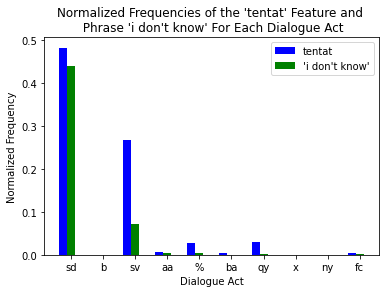

In [165]:
bar_width = 0.25

br1 = np.arange(len(ten_largest_das))
br2 = [x + bar_width for x in br1]

plt.bar(br1, norm_feature_counts.values(), color ='b', width = bar_width, label ='tentat')
plt.bar(br2, norm_phrase_counts.values(), color ='g', width = bar_width, label ='\'i don\'t know\'')

plt.xticks(br2, ten_largest_das)
plt.xlabel('Dialogue Act')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Frequencies of the \'tentat\' Feature and \n Phrase \'i don\'t know\' For Each Dialogue Act')

plt.legend()
plt.show()

# Part 3: Classification and Error Analysis

In [40]:
def train_classifier(train_feats, train_data, test_feats, test_data):
    clf = RandomForestClassifier()
    clf.fit(train_feats, train_data['da_tag'])

    predictions = clf.predict(test_feats)
    labels = test_data['da_tag']

    top_ten_preds = []
    top_ten_labels = []

    for i in range(len(labels)):
        if labels.iloc[i] in ten_largest_das:
            top_ten_preds.append(predictions[i])
            top_ten_labels.append(labels.iloc[i])
            
    print('F1 score:', f1_score(top_ten_labels, top_ten_preds, average='macro'))
    print('Accuracy:', accuracy_score(top_ten_labels, top_ten_preds))

In [ ]:
def train_classifier2(train_data, test_data):
    train_feats = train_data.drop(['dialog_id', 'da_tag', 'start_time', 'end_time'], axis=1)
    
    clf = RandomForestClassifier()
    clf.fit(train_feats, train_data['da_tag'])

    predictions = clf.predict(test_feats)
    labels = test_data['da_tag']

    top_ten_preds = []
    top_ten_labels = []

    for i in range(len(labels)):
        if labels.iloc[i] in ten_largest_das:
            top_ten_preds.append(predictions[i])
            top_ten_labels.append(labels.iloc[i])
            
    print('F1 score:', f1_score(top_ten_labels, top_ten_preds, average='macro'))
    print('Accuracy:', accuracy_score(top_ten_labels, top_ten_preds))

## Text Classifier

### Unprocessed

In [227]:
clf = RandomForestClassifier()
clf.fit(train_text_features, train_csv['da_tag'])

predictions = clf.predict(test_text_features)
labels = test_csv['da_tag']

top_ten_preds = []
top_ten_labels = []

for i in range(len(labels)):
    if labels[i] in ten_largest_das:
        top_ten_preds.append(predictions[i])
        top_ten_labels.append(labels[i])

RandomForestClassifier()

In [242]:
f1_score(top_ten_labels, top_ten_preds, average='macro')

0.15139274793940502

In [245]:
accuracy_score(top_ten_labels, top_ten_preds)

0.8054199752312959

In [49]:
train_classifier(train_text_features, train_csv, test_text_features, test_csv)

F1 score: 0.1703591152274149
Accuracy: 0.8070226560792598


### Processed

In [292]:
clf = RandomForestClassifier()
clf.fit(train_text_features_proc, train_text_proc['da_tag'])

predictions = clf.predict(test_text_features_proc)
labels = test_text_proc['da_tag']

top_ten_preds = []
top_ten_labels = []

for i in range(len(labels)):
    if labels.iloc[i] in ten_largest_das:
        top_ten_preds.append(predictions[i])
        top_ten_labels.append(labels.iloc[i])

In [293]:
f1_score(top_ten_labels, top_ten_preds, average='macro')

0.21894782643144903

In [294]:
accuracy_score(top_ten_labels, top_ten_preds)

0.8237690606448609

## Speech Classifier

In [ ]:
# TODO: combine to one ('dialog_id', 'speaker', 'start_time', 'end_time' 'da_tag')

### Unprocessed

In [53]:
train_classifier(train_speech_features.drop(['dialog_id', 'speaker', 'start_time', 'end_time'], axis=1),
                 train_csv,
                 test_speech_features.drop(['dialog_id', 'speaker', 'start_time', 'end_time'], axis=1),
                 test_csv)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Speech + Text Classifier